# first method

In [1]:
import pytesseract

In [2]:
# !pip install opencv-python

In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

# for configuration 

In [5]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [6]:
img = cv2.imread('C:\\Users\\HP\\Git\\License_plate_recognition\\demo.png')

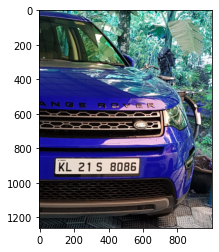

In [7]:
plt.imshow(img)

In [8]:
img2char = pytesseract.image_to_string(img)

In [9]:
print(img2char)

KL 215 8086




In [10]:
imbox = pytesseract.image_to_boxes(img)

In [11]:
type(imbox)

str

In [12]:
imgH, imgW,_ = img.shape

In [13]:
type(imgH)

int

In [14]:
img.shape

(1261, 1000, 3)

In [15]:
print(imbox)

K 115 328 152 394 0
L 156 328 188 379 0
2 229 328 262 378 0
1 274 328 302 411 0
5 333 328 364 378 0
8 413 329 444 378 0
0 453 329 483 378 0
8 491 300 523 379 0
6 531 330 561 379 0
~ 337 154 674 174 0
~ 0 0 1000 1261 0



In [16]:
for boxes in imbox.splitlines():
    boxes = boxes.split(' ')
    x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x, imgH - y), (w, imgH - h), (0, 0, 255), 3)

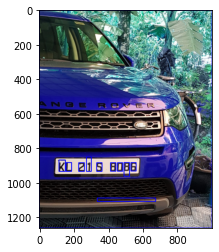

In [17]:
plt.imshow(img)

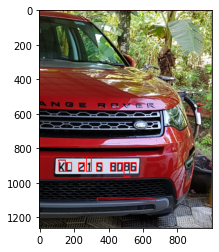

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# second method

In [19]:
# !pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [20]:
# !pip3 install torch

In [21]:
#  torchvision torchaudio

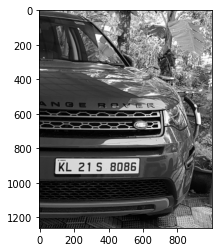

In [22]:
img = cv2.imread('C:\\Users\\HP\\Git\\License_plate_recognition\\demo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

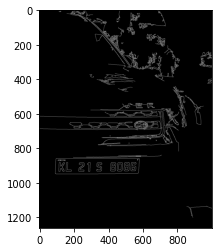

In [23]:
# applying filter and find edges for localization
bfilter = cv2.bilateralFilter(gray, 100, 100, 106) # NOISE REDUCTION
edged = cv2.Canny(bfilter, 30, 200) # EDGE DETECTION
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [24]:
# !pip install imutils

In [25]:
import imutils

In [26]:
import numpy as np

In [27]:
# Find contours and apply mask
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [28]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [29]:
location

array([[[ 97, 863]],

       [[ 99, 948]],

       [[575, 940]],

       [[577, 858]]], dtype=int32)

In [30]:
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask = mask)

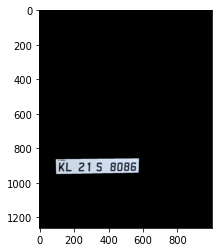

In [31]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [32]:
(x, y) = np.where(mask ==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

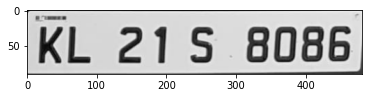

In [33]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [34]:
# !pip install easyocr

In [35]:
# import easyocr

In [36]:
# image to text
# reader = easyocr.Reader(['en'])
# result = reader.readtext(cropped_img)
# result

In [37]:
print(img2char)

KL 215 8086




In [38]:
# render result

In [39]:
result = pytesseract.image_to_string(cropped_img)

In [40]:
print(result)

KL 21S 8086


